In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import sys

src_dir = Path.cwd().parent.absolute()
sys.path.append(str(src_dir))

from src.data import get_train_val_dataloaders, IMAGENET_MEAN, IMAGENET_STD

In [2]:
train_loader, val_loader = get_train_val_dataloaders(
    batch_size=32,
    num_workers=4,
)

In [3]:
def denormalize(img_tensor):
    img = img_tensor.permute(1, 2, 0).cpu().numpy()
    img = img * IMAGENET_STD + IMAGENET_MEAN
    img = np.clip(img, 0, 1)
    return img

In [4]:
def sample_by_class(dataloader, num_pos=4, num_neg=4):
    pos_imgs = []
    neg_imgs = []

    for imgs, labels in dataloader:
        for img, label in zip(imgs, labels):
            if label.item() == 1 and len(pos_imgs) < num_pos:
                pos_imgs.append(img)
            elif label.item() == 0 and len(neg_imgs) < num_neg:
                neg_imgs.append(img)

        if len(pos_imgs) == num_pos and len(neg_imgs) == num_neg:
            break

    return pos_imgs, neg_imgs

In [5]:
pos_samples, neg_samples = sample_by_class(train_loader)

In [6]:
def show_images(title, images):
    fig, axes = plt.subplots(1, len(images), figsize=(4 * len(images), 4))
    fig.suptitle(title, fontsize=16)

    for ax, img in zip(axes, images):
        ax.imshow(denormalize(img))
        ax.axis("off")

    plt.show()

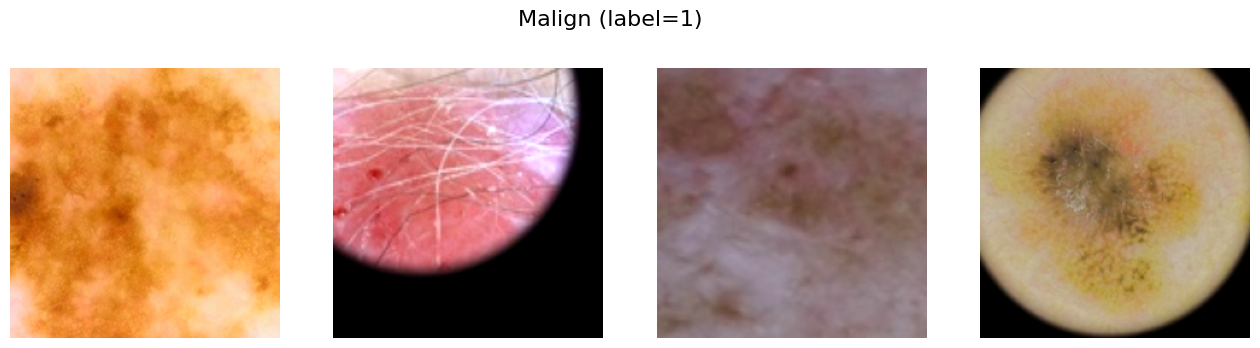

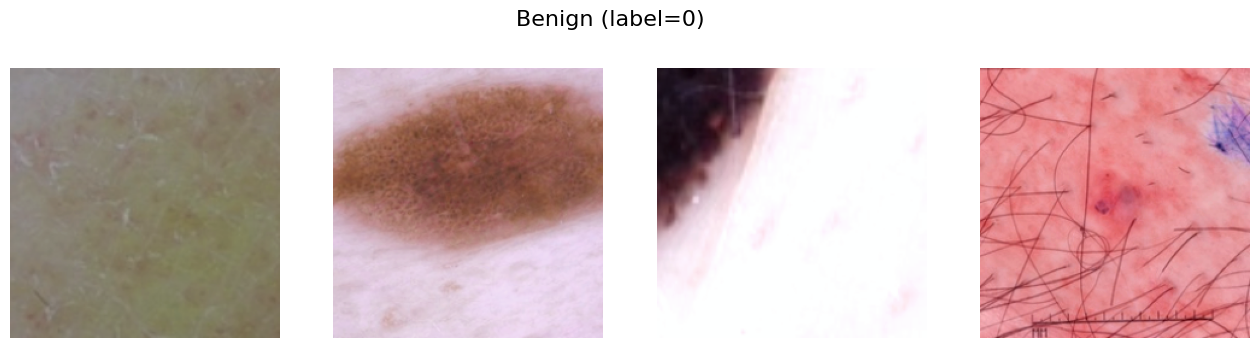

In [7]:
show_images("Malign (label=1)", pos_samples)
show_images("Benign (label=0)", neg_samples)